In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Decision Tree Classifier</h1>

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
from sklearn.datasets import load_iris

In [9]:
data=load_iris()

In [12]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
df=pd.DataFrame(data=data.data)

In [14]:
df['class']=data.target

In [16]:
df.tail()

,0,1,2,3,class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [21]:
df.columns

Index([0, 1, 2, 3, 'class'], dtype='object')

In [22]:
x=df[[0,1,2,3]]

In [23]:
x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y=df['class']

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

<h1> Holdout</h1>

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [42]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [43]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.9555555555555556


In [51]:
clf1=DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf1=clf1.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)

In [52]:
print("accuracy",metrics.accuracy_score(y_test,y_pred1))

accuracy 0.9555555555555556


Classifiaction Metrics


C:\Users\Saloni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


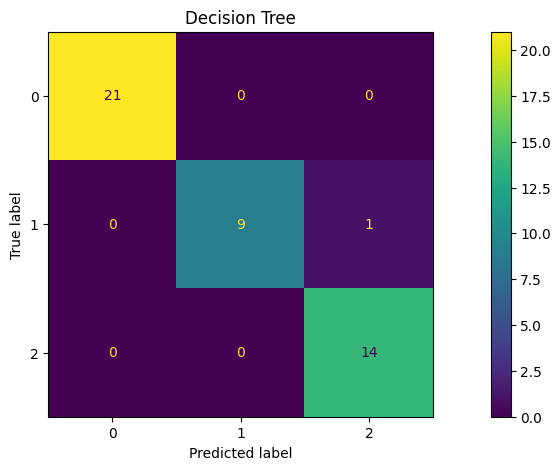

In [66]:
print("Classifiaction Metrics")
from sklearn.metrics import plot_confusion_matrix,classification_report
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decision Tree")
plot_confusion_matrix(clf,x_test,y_test,ax=ax1)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



<h1>Random subsampling<h1>

In [56]:
x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [59]:
random_samples=5
accuracy_scores=[]
for i in range(random_samples):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    clf=DecisionTreeClassifier()
    clf=clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=metrics.accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy for iteration ",i,accuracy_scores[i])

Accuracy for iteration  0 0.9777777777777777
Accuracy for iteration  1 0.9555555555555556
Accuracy for iteration  2 0.9555555555555556
Accuracy for iteration  3 0.8888888888888888
Accuracy for iteration  4 0.9777777777777777


In [60]:
mean_accuracy=np.mean(accuracy_scores)

In [61]:
print(mean_accuracy)

0.9511111111111111


<h1>Cross Validation</h1>

In [40]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import datasets

In [73]:
clf=DecisionTreeClassifier(random_state=42)

In [74]:
k_folds=KFold(n_splits=5)

In [75]:
X,y=datasets.load_iris(return_X_y=True)

In [76]:
scores=cross_val_score(clf,X,y,cv=k_folds)

In [77]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


<h1>Naive Bayes

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

data=load_iris()
df1=pd.DataFrame(data.data)

In [6]:
df1

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
x1=df1[[0,1,2,3]]

In [8]:
df1['class']=data.target

In [9]:
y1=df1['class']

In [10]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.33, random_state=125)

In [11]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x1_train,y1_train)

GaussianNB()

In [13]:
from sklearn.metrics import (accuracy_score, confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)

In [17]:
y1_pred=model.predict(x1_test)
accuracy=accuracy_score(y1_pred,y1_test)
f1=f1_score(y1_pred,y1_test,average="weighted")

In [18]:
print("Accuracy ",accuracy)
print("F1 score ",f1)

Accuracy  0.98
F1 score  0.9800591133004926


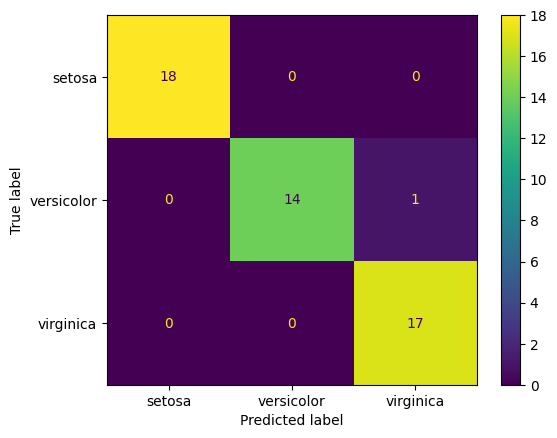

In [23]:
cm=confusion_matrix(y1_test,y1_pred)
labels = ["setosa","versicolor","virginica"]
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

<h1>K nearest</h1>

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y1_pred=knn.predict(x1_test)

In [35]:
accuracy=accuracy_score(y1_test,y1_pred)

In [37]:
print(accuracy)

1.0


In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x1, y1, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

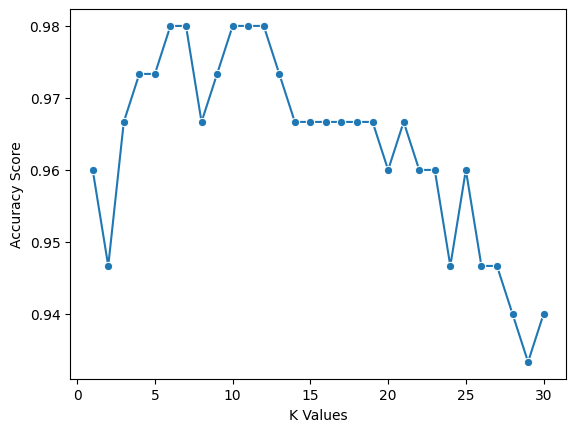

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")